# SurveyMonkey/FiveThirtyEight/WNYC Masculinity Poll


<b>Before we get the data and start exploring it, let's download all the dependencies that we will need.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('/Users/stann-omar.jones/Downloads/raw-responses.csv')

In [3]:
df.shape

(1615, 98)

In [4]:
df.head(20)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Na

In [5]:
#Get an overview of the data and all unique values in the dataframe

for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Unnamed: 0
[   1    2    3 ... 1613 1614 1615]


StartDate
['5/10/18 4:01' '5/10/18 6:30' '5/10/18 7:02' ... '5/22/18 9:22'
 '5/22/18 9:44' '5/22/18 9:55']


EndDate
['5/10/18 4:06' '5/10/18 6:53' '5/10/18 7:09' ... '5/22/18 9:39'
 '5/22/18 9:50' '5/22/18 10:00']


q0001
['Somewhat masculine' 'Very masculine' 'Not at all masculine'
 'Not very masculine' 'No answer']


q0002
['Somewhat important' 'Not too important' 'Very important'
 'Not at all important' 'No answer']


q0004_0001
['Not selected' 'Father or father figure(s)']


q0004_0002
['Not selected' 'Mother or mother figure(s)']


q0004_0003
['Not selected' 'Other family members']


q0004_0004
['Pop culture' 'Not selected']


q0004_0005
['Not selected' 'Friends']


q0004_0006
['Not selected' 'Other (please specify)']


q0005
['Yes' 'No' 'No answer']


q0007_0001
['Often' 'Rarely' 'Sometimes' 'Never, but open to it'
 'Never, and not open to it' 'No answer']


q0007_0002
['Often' 'Sometimes' 'Rarely' 'Never, but open to it' 'No answ

In [6]:
df.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [7]:
df.rename({'Unnamed: 0':'ID'}, axis=1, inplace=True)
df['ID'].apply(np.int64)
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,

In [8]:
#Get a sense of the data types contained in all variable columns in df

with pd.option_context('display.max_rows', None):
    print(df.dtypes)

ID               int64
StartDate       object
EndDate         object
q0001           object
q0002           object
q0004_0001      object
q0004_0002      object
q0004_0003      object
q0004_0004      object
q0004_0005      object
q0004_0006      object
q0005           object
q0007_0001      object
q0007_0002      object
q0007_0003      object
q0007_0004      object
q0007_0005      object
q0007_0006      object
q0007_0007      object
q0007_0008      object
q0007_0009      object
q0007_0010      object
q0007_0011      object
q0008_0001      object
q0008_0002      object
q0008_0003      object
q0008_0004      object
q0008_0005      object
q0008_0006      object
q0008_0007      object
q0008_0008      object
q0008_0009      object
q0008_0010      object
q0008_0011      object
q0008_0012      object
q0009           object
q0010_0001      object
q0010_0002      object
q0010_0003      object
q0010_0004      object
q0010_0005      object
q0010_0006      object
q0010_0007      object
q0010_0008 

In [9]:
#Count the missing values in each column. Note that "True" represents the missing values 
#and "False" represents extant values in dataset.

df_missing = df.isnull()
df.head(10)

for column in df.columns.values.tolist():
    print("Column Name:",column)
    print(df_missing[column].value_counts())
    print("------------------------------------------------------")

Column Name: ID
False    1615
Name: ID, dtype: int64
------------------------------------------------------
Column Name: StartDate
False    1615
Name: StartDate, dtype: int64
------------------------------------------------------
Column Name: EndDate
False    1615
Name: EndDate, dtype: int64
------------------------------------------------------
Column Name: q0001
False    1615
Name: q0001, dtype: int64
------------------------------------------------------
Column Name: q0002
False    1615
Name: q0002, dtype: int64
------------------------------------------------------
Column Name: q0004_0001
False    1615
Name: q0004_0001, dtype: int64
------------------------------------------------------
Column Name: q0004_0002
False    1615
Name: q0004_0002, dtype: int64
------------------------------------------------------
Column Name: q0004_0003
False    1615
Name: q0004_0003, dtype: int64
------------------------------------------------------
Column Name: q0004_0004
False    1615
Name: q0004_00

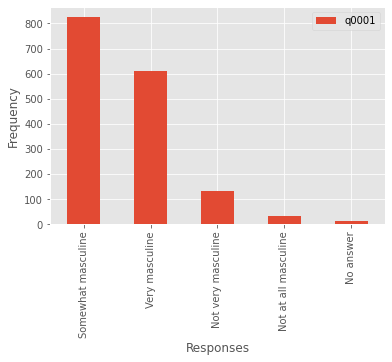

In [10]:
df['q0001'].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

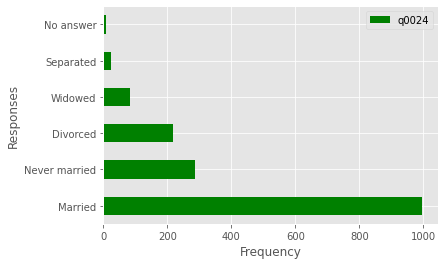

In [11]:
df['q0024'].value_counts().plot(kind='barh', color = 'green', legend=True)
plt.xlabel('Frequency')
plt.ylabel('Responses')
plt.show()

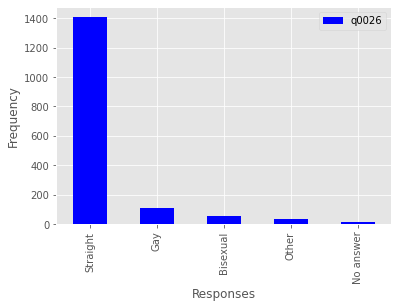

In [12]:
df['q0026'].value_counts().plot(kind='bar', color = 'blue', legend = True)
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

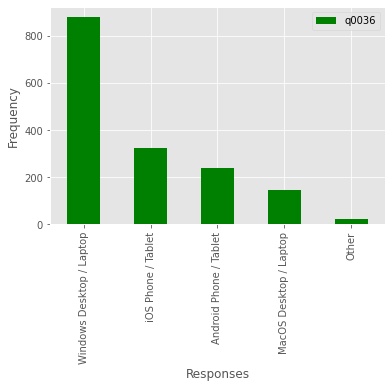

In [13]:
df['q0036'].value_counts().plot(kind='bar', color='green', legend = True)
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

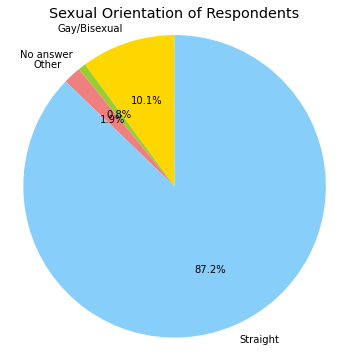

In [14]:
custom_labels = df['orientation'].unique()
orientation_counts = df.groupby('orientation').size().reset_index(name='count')

orientation_counts

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(orientation_counts['count'], labels=orientation_counts['orientation'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sexual Orientation of Respondents')

plt.axis('equal')
plt.show()

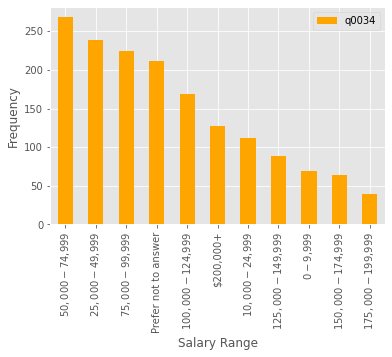

In [15]:
df['q0034'].value_counts().plot(kind='bar', color='orange', legend = True)
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.show()

In [16]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,

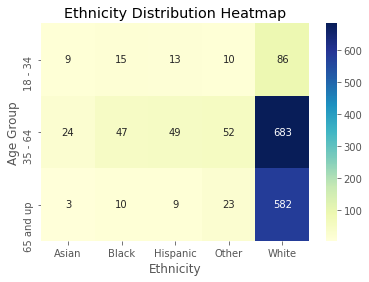

In [17]:
pivot_df = df.pivot_table(index='age3', columns='q0028', values='race2', aggfunc='count')
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Ethnicity')
plt.ylabel('Age Group')
plt.title('Ethnicity Distribution Heatmap')
plt.show()

In [18]:
import geopandas as gpd

# Load US state shapefile
us_states = gpd.read_file("/Users/stann-omar.jones/Downloads/s_08mr23/s_08mr23.shp")
us_states

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
...,...,...,...,...,...,...
54,PW,Palau,70,134.511333,7.423531,"MULTIPOLYGON (((131.81223 2.97520, 131.81258 2..."
55,MH,Marshall Islands,68,169.680752,7.460447,"MULTIPOLYGON (((169.55728 5.82567, 169.55684 5..."
56,MP,Northern Mariana Islands,69,145.611142,15.776698,"MULTIPOLYGON (((145.14309 14.14635, 145.14262 ..."
57,FM,Fed States of Micronesia,64,154.784715,7.089268,"MULTIPOLYGON (((154.78084 1.02639, 154.77972 1..."


/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


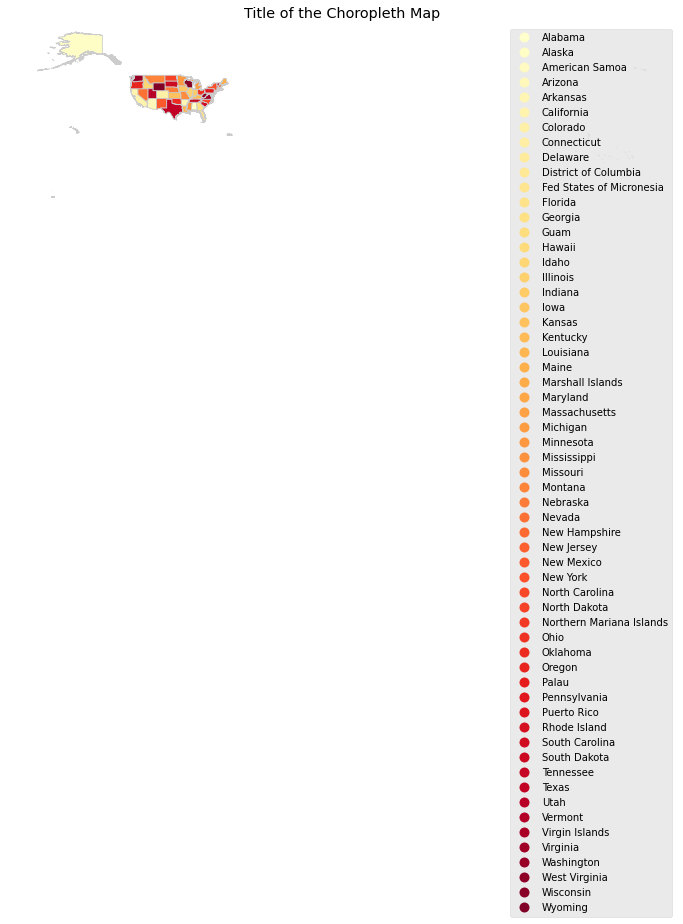

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
us_states.plot(column='NAME', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Title of the Choropleth Map')

# Optional: Customize the plot, add labels, etc.
plt.axis('off')  # Turn off axis labels and ticks

# Show the plot
plt.show()

# Load your survey data
#survey_data = pd.read_csv("path/to/survey_data.csv")

In [20]:
# Merge survey data with shapefile based on a common column (e.g., state abbreviations)
merged_data = us_states.merge(df, left_on='NAME', right_on='q0030', how='right')
merged_data

,STATE,NAME,FIPS,LON,LAT,geometry,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",97,5/13/18 4:30,5/13/18 4:36,Not very masculine,Not at all important,Father or father figure(s),Mother or mother figure(s),Other family members,Pop culture,Friends,Not selected,No,"Never, but open to it","Never, but open to it","Never, and not open to it",Rarely,"Never, but open to it",Sometimes,"Never, but open to it",Rarely,Rarely,"Never, and not open to it",Often,Not selected,Your weight,Your hair or hairline,Your physique,Appearance of your genitalia,Not selected,Sexual performance or amount of sex,Not selected,Not selected,"Your finances, including your current or futur...",Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,Not selected,Did not respond at all,Not selected,Not selected,Other (please specify),Nothing at all,NaN,Yes,Always,It?s the right thing to do,Not selected,Not selected,Not selected,"You asked the person out, so you feel obligate...",Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,Not selected,No children,Other,White,High school or G.E.D.,Alabama,"$25,000-$49,999",East South Central,Android Phone / Tablet,White,White,High school or less,High school or less,35 - 64,No children,Other,5.954694
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",264,5/15/18 12:04,5/15/18 12:10,Very masculine,Somewhat important,Father or father figure(s),Mother or mother figure(s),Other family members,Pop culture,Friends,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Sometimes,"Never, and not open to it",Often,Often,"Never, but open to it",Sometimes,Not selected,Your weight,Your hair or hairline,Your physique,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected,NaN,A lot,No,Yes,Often,It?s the right thing to do,You make more money than your date,Not selected,"Societal expectations, even though you don?t a...","You asked the person out, so you feel obligate...",Not selected,Not selected,Read their physical body language to see if th...,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,N

In [21]:
state_counts = merged_data.groupby('NAME')['ID'].count().reset_index()
state_counts = state_counts.rename(columns={'ID': 'no_of_responses'})
state_counts

,NAME,no_of_responses
0,Alabama,17
1,Alaska,3
2,Arizona,43
3,Arkansas,8
4,California,174
5,Colorado,29
6,Connecticut,20
7,Delaware,6
8,Florida,116
9,Georgia,45


In [22]:
# Merge the count data back into the us_states GeoDataFrame
us_states = us_states.merge(state_counts, left_on='NAME', right_on='NAME', how='left')

/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


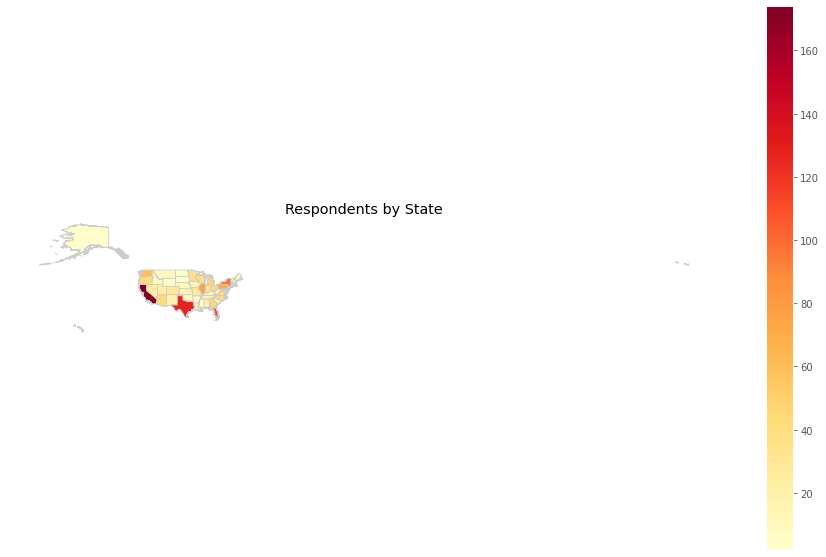

In [23]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
us_states.plot(column='no_of_responses', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Respondents by State')
plt.axis('off')  # Turn off axis labels and ticks

plt.show()

In [24]:
#After ascertaining what are the unique values in a given variable column, we can then order the values as seen below.

df.q0001.unique()

array(['Somewhat masculine', 'Very masculine', 'Not at all masculine',
       'Not very masculine', 'No answer'], dtype=object)

In [25]:
#Creating a function that converts all values of df[q0001] into a series of ordinal variables

def q0001_to_numeric(x):
    if x=='Not at all masculine': return 0
    if x=='Not very masculine':   return 1
    if x=='Somewhat masculine':   return 2
    if x=='Very masculine':       return 3
    if x=='No answer':           return 99

# Applying the function to the variable column

df['q0001'] = df['q0001'].apply(q0001_to_numeric)
print(df['q0001'])

0       2
1       2
2       3
3       3
4       3
       ..
1610    1
1611    3
1612    2
1613    2
1614    3
Name: q0001, Length: 1615, dtype: int64


In [26]:
#We remove variables coded as 99 across the dataset because it will be quantized
#and run in an ML algorith. As a result, the lack of responses provide no predictive context. 

df.replace(99, np.nan, inplace=True)
df.dropna(subset=['q0001'], inplace=True)

In [27]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1.0,5/10/18 4:01,5/10/18 4:06,2.0,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2.0,5/10/18 6:30,5/10/18 6:53,2.0,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3.0,5/10/18 7:02,5/10/18 7:09,3.0,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,Sometimes,NaN,NaN,NaN,NaN,Na

In [28]:
df.q0002.unique()

array(['Somewhat important', 'Not too important', 'Very important',
       'Not at all important', 'No answer'], dtype=object)

In [29]:
# Creating a function that converts all values of df['q0002'] into ordinal variables

def q0002_to_numeric(x):
    if x=='Not at all important': return 0
    if x=='Somewhat important':   return 1
    if x=='Not too important':    return 2
    if x=='Very important':       return 3
    if x=='No answer':            return 99

# Applying the function to the variable column

df['q0002'] = df['q0002'].apply(q0002_to_numeric)
print(df['q0002'])

0       1
1       1
2       2
3       2
4       3
       ..
1610    0
1611    3
1612    1
1613    1
1614    0
Name: q0002, Length: 1601, dtype: int64


In [30]:
#After replacing unobserved variables coded as 99 with NaN (Not a Number), we drop them from df.

df.replace(99, np.nan, inplace=True)
df.dropna(subset=['q0002'], inplace=True)
df[['q0002']]

,q0002
0,1.0
1,1.0
2,2.0
3,2.0
4,3.0
...,...
1610,0.0
1611,3.0
1612,1.0
1613,1.0


In [31]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1.0,5/10/18 4:01,5/10/18 4:06,2.0,1.0,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2.0,5/10/18 6:30,5/10/18 6:53,2.0,1.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3.0,5/10/18 7:02,5/10/18 7:09,3.0,2.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not sele

In [32]:
# To get unique values in 1 column
print(f"Unique values: {df['q0004_0001'].unique()}")
print('\n')
 
# Extending the idea from 1 column to multiple columns

print(f"Unique Values from 3 Columns:\
{pd.concat([df['q0004_0001'],df['q0004_0002'],df['q0004_0003'],df['q0004_0004'], df['q0004_0005'], df['q0004_0006']]).unique()}")

Unique values: ['Not selected' 'Father or father figure(s)']


Unique Values from 3 Columns:['Not selected' 'Father or father figure(s)' 'Mother or mother figure(s)'
 'Other family members' 'Pop culture' 'Friends' 'Other (please specify)']


In [33]:
#Run a for loop to get a better sense of unique values from all CATA questions in dataset 
#esp to account for missing variables.

#Print only column names first

for col in ['q0004_0001','q0004_0002', 'q0004_0003', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008','q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005','q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007','q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004','q0025_0001', 'q0025_0002', 'q0025_0003']:
    if df[col].isnull().any():
        print(col)

#Print more column stats like proportion of responses for each prompt and number of missing values, if any

for col in ['q0004_0001','q0004_0002', 'q0004_0003', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008','q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005','q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007','q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004','q0025_0001', 'q0025_0002', 'q0025_0003']:
    #if df[col].isnull().any():
        print(df[col].value_counts())
        print(" \nCount total NaN at each column in a DataFrame :")
        print(df[col].isnull().sum())
        print('\n')

q0010_0001
q0010_0002
q0010_0003
q0010_0004
q0010_0005
q0010_0006
q0010_0007
q0010_0008
q0011_0001
q0011_0002
q0011_0003
q0011_0004
q0011_0005
q0012_0001
q0012_0002
q0012_0003
q0012_0004
q0012_0005
q0012_0006
q0012_0007
q0019_0001
q0019_0002
q0019_0003
q0019_0004
q0019_0005
q0019_0006
q0019_0007
Father or father figure(s)    1101
Not selected                   496
Name: q0004_0001, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected                  947
Mother or mother figure(s)    650
Name: q0004_0002, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected            1039
Other family members     558
Name: q0004_0003, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected            1039
Other family members     558
Name: q0004_0003, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected    1297
Pop culture      300
Name: q0004_0004, dtype: int64
 
Count total NaN at each column in 

Name: q0021_0001, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected                                                                   1566
Talked with a friend or friends about whether you pushed a partner too far.      31
Name: q0021_0002, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected                                                                                        1563
Contacted a past sexual partner to ask whether you went too far in any of you sexual encounters.      34
Name: q0021_0003, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


None of the above    1402
Not selected          195
Name: q0021_0004, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Not selected                          1344
Yes, one or more children under 18     253
Name: q0025_0001, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


Yes, one or more children 18 or older    866
Not selected  

In [34]:
df[['q0004_0001','q0004_0002', 'q0004_0003', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006']]

,q0004_0001,q0004_0002,q0004_0003,q0004_0003,q0004_0004,q0004_0005,q0004_0006
0,Not selected,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected
1,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Not selected
2,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
3,Father or father figure(s),Mother or mother figure(s),Other family members,Other family members,Not selected,Not selected,Not selected
4,Not selected,Not selected,Other family members,Other family members,Not selected,Not selected,Not selected
...,...,...,...,...,...,...,...
1610,Father or father figure(s),Mother or mother figure(s),Other family members,Other family members,Pop culture,Friends,Not selected
1611,Father or father figure(s),Not selected,Other family members,Other family members,Not selected,Not selected,Not selected
1612,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,Not selected
1613,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,Not selected


In [35]:
#I dropped rows with missing values for the columns below. This subset comprised respondents who were employed, 
#probably skewing older due to the exclusion of students and other unemployed subgroups of men.

#The question for the researcher is whether the exclusion of these rows will help the ML model accurately predict 
#how masculine a respondent will be.
#This creates a truncated dataset.

# I will run an untruncated version of this dataset, allowing us to preserve the representativeness of the sample. 
# to see what effect these changes may have on the ML model and related coefficients. 

#Will it be more or less accurate as it retains its representativeness?

df.dropna(subset=['q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008','q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005','q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007'], inplace=True)
df[['q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005','q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005','q0012_0001', 'q0012_0002','q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007']]

,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007
2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
4,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected
5,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected,Confronted the accused person,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected
6,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Not selected,Not selected,Reached out to the victim to offer support,Not selected,Not selected,Not selected
8,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected
1610,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected
1611,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected
1612,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected


In [36]:
#I also decided to drop missing variables in q0019. This subset (n=1251) refers to responds who always or often
#pay on the first date. 

df.dropna(subset=['q0019_0001', 'q0019_0002','q0019_0003', 'q0019_0004', 
                  'q0019_0005', 'q0019_0006', 'q0019_0007'], inplace=True)
df[['q0019_0001', 'q0019_0002','q0019_0003', 'q0019_0004', 
    'q0019_0005', 'q0019_0006', 'q0019_0007']]

,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007
4,Not selected,Not selected,Not selected,"Societal expectations, even though you don?t a...",Not selected,Not selected,Not selected
5,It?s the right thing to do,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected
8,It?s the right thing to do,Not selected,You feel good about being the one who pays,Not selected,"You asked the person out, so you feel obligate...",Not selected,Not selected
9,It?s the right thing to do,Not selected,You feel good about being the one who pays,"Societal expectations, even though you don?t a...","You asked the person out, so you feel obligate...",Not selected,Not selected
10,It?s the right thing to do,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected
...,...,...,...,...,...,...,...
1603,Not selected,Not selected,Not selected,"Societal expectations, even though you don?t a...","You asked the person out, so you feel obligate...",Not selected,Not selected
1607,Not selected,Not selected,Not selected,"Societal expectations, even though you don?t a...",Not selected,Not selected,Not selected
1611,It?s the right thing to do,Not selected,You feel good about being the one who pays,Not selected,"You asked the person out, so you feel obligate...",Not selected,Not selected
1612,It?s the right thing to do,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected


In [37]:
#Create a function to return: 0 for non-response or missing values and 1 for all observed variables responses
#Because I already dropped rows from columns with missing values, 
#I can simply apply this function across all CATA columns.

def q0004_to_numeric(x):
    if x=='Not selected' or x == np.nan:                 
        return 0
    else: 
        return 1

In [38]:
#Apply function across all CATA variable columns

for col in ['q0004_0001','q0004_0002', 'q0004_0003', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008','q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005','q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007','q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004','q0025_0001', 'q0025_0002', 'q0025_0003']:
    df[col] = df[col].apply(lambda x: q0004_to_numeric(x))
    

In [39]:
#We are now down to 701 rows. We started with n=1615. 

#This is because we dropped respondents who did not respond to subset questions. Subset questions in this 
#masculinity dataset recorded responses for individuals who were unemployed as well as those who paid on the first date etc.

#Is this the right approach? Considerations are that responses may be correlated to greater levels of masculinity
#since men who pay on the first date may have traditional outlook on the role of men in the dating world.

#In addition, men who are employed MAY be more likely to perceive themselves as masculine due to the premium placed
#on men who are breadwinners, active, or independent contributors to their households. 

#Despite this skew towards this subset of the survey population, it is important to measure these responses 
#as these questions are potentially strong indicators of masculinity given their relevance of the survey's 
#emphasis on the MeToo movement which is highly related to mens' behaviors in the realms of work and dating.

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,Yes,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,0,1,0,0,0,0,0,0,0,0,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,Yes,No,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,No,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,Yes,"Never, but open to it",Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Sometimes,Often,"Never, but open to it","Never, and not open to it",0,0,0,0,0,0,0,0,0,0,0,1,"Employed, working full-time",0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,Only a little,No,No,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,No,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,No,Sometimes,Sometimes,Sometimes,Sometimes,"Never, but open to it",Often,"Never, and not open to it",Often,Sometimes,"Never, and not open to it",Rarely,0,1,1,0,0,0,1,0,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,No,No,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,No,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,No,Sometimes,Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,0,1,0,1,0,1,1,0,1,0,0,0,"Employed, working full-time",0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN,Some,No,Yes,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,No,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,No,Sometimes,Rarely,Rarely,Rarely,"Never, but open to it",Sometimes,"Never, and not open to it",Rarely,Rarely,Rarely,"Never, but open to it",0,1,0,1,1,0,1,1,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,You weren?t sure it was sexual harassment,Some,No,Yes,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,No,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [40]:
#Check the proportion of responses to Yes/No/No Answer questions in specific df columns.

for col in ['q0005', 'q0015', 'q0017', 'q0022']:
    print(col)
    print(df[col].value_counts())
    print(" \nCount total NaN at each column in a DataFrame :")
    print(df[col].isnull().sum())
    print('\n')

q0005
Yes          422
No           277
No answer      2
Name: q0005, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


q0015
No           383
Yes          203
No answer      6
Name: q0015, dtype: int64
 
Count total NaN at each column in a DataFrame :
109


q0017
Yes          507
No           190
No answer      4
Name: q0017, dtype: int64
 
Count total NaN at each column in a DataFrame :
0


q0022
No           639
Yes           58
No answer      4
Name: q0022, dtype: int64
 
Count total NaN at each column in a DataFrame :
0




In [41]:
df[['q0015']]

,q0015
4,Yes
5,No
8,No
9,No
10,No
...,...
1603,No
1607,Yes
1611,Yes
1612,Yes


In [42]:
#As a subset question having to do with all respondents who have heard of MeToo, 
#q0015 shown above has missing values so I will drop rows once more, giving us n=592

#This column could potentially be dropped. Is it important to model? Not sure.

#I will test a version of the truncated dataset with and without this column perhaps.

df.dropna(subset=['q0015'], inplace=True)
df[['q0015']]

,q0015
4,Yes
5,No
8,No
9,No
10,No
...,...
1603,No
1607,Yes
1611,Yes
1612,Yes


In [43]:
#Apply the function across all Y/N variable columns.

def yes_no_to_numeric(x):
    if x=='No':                 return 0
    if x=='Yes':                return 1
    if x=='No answer':          return 99

# Applying the function to the q0005 variable

df['q0005'] = df['q0005'].apply(yes_no_to_numeric)
df['q0015'] = df['q0015'].apply(yes_no_to_numeric)
df['q0017'] = df['q0017'].apply(yes_no_to_numeric)
df['q0022'] = df['q0022'].apply(yes_no_to_numeric)
df['q0005']
df['q0015']
df['q0017']
df['q0022']

4       0
5       0
8       0
9       0
10      0
       ..
1603    0
1607    0
1611    0
1612    0
1613    1
Name: q0022, Length: 592, dtype: int64

In [44]:
#Further remove values coded as 99, n=586

df.drop(df[df['q0015'] == 99].index, inplace=True)

In [45]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,0,1,0,0,0,0,0,0,0,0,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,1,0,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1,"Never, but open to it",Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Sometimes,Often,"Never, but open to it","Never, and not open to it",0,0,0,0,0,0,0,0,0,0,0,1,"Employed, working full-time",0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,Only a little,0,0,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0,Sometimes,Sometimes,Sometimes,Sometimes,"Never, but open to it",Often,"Never, and not open to it",Often,Sometimes,"Never, and not open to it",Rarely,0,1,1,0,0,0,1,0,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,0,0,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0,Sometimes,Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,0,1,0,1,0,1,1,0,1,0,0,0,"Employed, working full-time",0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN,Some,0,1,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0,Sometimes,Rarely,Rarely,Rarely,"Never, but open to it",Sometimes,"Never, and not open to it",Rarely,Rarely,Rarely,"Never, but open to it",0,1,0,1,1,0,1,1,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,You weren?t sure it was sexual harassment,Some,0,1,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [46]:
#Create mapping for q0007

q0007_dict = {'Often':4, 'Rarely':3, 'Sometimes':2, 'Never, but open to it':1,
       'Never, and not open to it':0, 'No answer':99}

In [47]:
q0007_dict

{'Often': 4,
 'Rarely': 3,
 'Sometimes': 2,
 'Never, but open to it': 1,
 'Never, and not open to it': 0,
 'No answer': 99}

In [48]:
#Apply mapping across all q0007 columns

for col in [col for col in df.columns if 'q0007' in col]:
    df[col] = df[col].map(q0007_dict)

In [49]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1,2,3,0,1,1,2,0,4,3,1,2,0,1,0,0,0,0,0,0,0,0,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,1,0,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1,1,2,2,3,1,4,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"Employed, working full-time",0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,Only a little,0,0,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0,2,2,2,2,1,4,0,4,2,0,3,0,1,1,0,0,0,1,0,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,0,0,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0,2,3,0,3,0,4,0,4,3,1,2,0,1,0,1,0,1,1,0,1,0,0,0,"Employed, working full-time",0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN,Some,0,1,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0,2,3,3,3,1,2,0,3,3,3,1,0,1,0,1,1,0,1,1,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,You weren?t sure it was sexual harassment,Some,0,1,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1,2,4,1,3,1,4,1,3,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,0,1,Always,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,Married,1,0,0,Straight,White,Some college,Washington,"$100,000-$124,999",Pacific,Windows Desktop / Laptop,White,White,Some college,Some college,35 - 64,Has children,Straight,1.117594
1607,1608.0,5/22/18 7:34,5/22/18 7:39,3.0,1.0,1,0,1,0,0,0,1,2,1,3,3,0,4,0

In [50]:
# Define a dictionary to map states to regions
q0035_dict = {
    'Alabama': 'South Atlantic', 'Alaska': 'Pacific', 'Arizona': 'Mountain', 'Arkansas': 'West South Central',
    'California': 'Pacific', 'Colorado': 'Mountain', 'Connecticut': 'New England', 'Delaware': 'South Atlantic',
    'Florida': 'South Atlantic', 'Georgia': 'South Atlantic', 'Hawaii': 'Pacific', 'Idaho': 'Mountain',
    'Illinois': 'East North Central', 'Indiana': 'East North Central', 'Iowa': 'West North Central',
    'Kansas': 'West North Central', 'Kentucky': 'East South Central', 'Louisiana': 'West South Central',
    'Maine': 'New England', 'Maryland': 'South Atlantic', 'Massachusetts': 'New England', 'Michigan': 'East North Central',
    'Minnesota': 'West North Central', 'Mississippi': 'East South Central', 'Missouri': 'West North Central',
    'Montana': 'Mountain', 'Nebraska': 'West North Central', 'Nevada': 'Mountain', 'New Hampshire': 'New England',
    'New Jersey': 'Middle Atlantic', 'New Mexico': 'Mountain', 'New York': 'Middle Atlantic', 'North Carolina': 'South Atlantic',
    'North Dakota': 'West North Central', 'Ohio': 'East North Central', 'Oklahoma': 'West South Central',
    'Oregon': 'Pacific', 'Pennsylvania': 'Middle Atlantic', 'Rhode Island': 'New England', 'South Carolina': 'South Atlantic',
    'South Dakota': 'West North Central', 'Tennessee': 'East South Central', 'Texas': 'West South Central',
    'Utah': 'Mountain', 'Vermont': 'New England', 'Virginia': 'South Atlantic', 'Washington': 'Pacific',
    'West Virginia': 'South Atlantic', 'Wisconsin': 'East North Central', 'Wyoming': 'Mountain'
}

In [51]:
q0035_dict

{'Alabama': 'South Atlantic',
 'Alaska': 'Pacific',
 'Arizona': 'Mountain',
 'Arkansas': 'West South Central',
 'California': 'Pacific',
 'Colorado': 'Mountain',
 'Connecticut': 'New England',
 'Delaware': 'South Atlantic',
 'Florida': 'South Atlantic',
 'Georgia': 'South Atlantic',
 'Hawaii': 'Pacific',
 'Idaho': 'Mountain',
 'Illinois': 'East North Central',
 'Indiana': 'East North Central',
 'Iowa': 'West North Central',
 'Kansas': 'West North Central',
 'Kentucky': 'East South Central',
 'Louisiana': 'West South Central',
 'Maine': 'New England',
 'Maryland': 'South Atlantic',
 'Massachusetts': 'New England',
 'Michigan': 'East North Central',
 'Minnesota': 'West North Central',
 'Mississippi': 'East South Central',
 'Missouri': 'West North Central',
 'Montana': 'Mountain',
 'Nebraska': 'West North Central',
 'Nevada': 'Mountain',
 'New Hampshire': 'New England',
 'New Jersey': 'Middle Atlantic',
 'New Mexico': 'Mountain',
 'New York': 'Middle Atlantic',
 'North Carolina': 'South A

In [52]:
#Apply mapping on q0035 columns

df['q0035'] = df['q0030'].map(q0035_dict)

In [53]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1,2,3,0,1,1,2,0,4,3,1,2,0,1,0,0,0,0,0,0,0,0,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,1,0,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1,1,2,2,3,1,4,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"Employed, working full-time",0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,Only a little,0,0,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0,2,2,2,2,1,4,0,4,2,0,3,0,1,1,0,0,0,1,0,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,0,0,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0,2,3,0,3,0,4,0,4,3,1,2,0,1,0,1,0,1,1,0,1,0,0,0,"Employed, working full-time",0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN,Some,0,1,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0,2,3,3,3,1,2,0,3,3,3,1,0,1,0,1,1,0,1,1,1,1,1,0,"Employed, working full-time",0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,You weren?t sure it was sexual harassment,Some,0,1,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1,2,4,1,3,1,4,1,3,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,"Employed, working full-time",0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,0,1,Always,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,Married,1,0,0,Straight,White,Some college,Washington,"$100,000-$124,999",Pacific,Windows Desktop / Laptop,White,White,Some college,Some college,35 - 64,Has children,Straight,1.117594
1607,1608.0,5/22/18 7:34,5/22/18 7:39,3.0,1.0,1,0,1,0,0,0,1,2,1,3,3,0,4,0

In [54]:
#I removed rows with variables containing the value 99 in q0007, n=518.

df.replace(99, np.nan, inplace=True)
df.dropna(subset=['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011'], inplace=True)
df[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011']]

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011
4,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0
5,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0
8,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0
9,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0
10,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1602,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0
1603,2.0,4.0,1.0,3.0,1.0,4.0,1.0,3,4.0,1.0,0.0
1607,2.0,1.0,3.0,3.0,0.0,4.0,0.0,4,4.0,1.0,0.0
1611,4.0,4.0,2.0,1.0,3.0,4.0,0.0,4,2.0,1.0,2.0


In [55]:
df.columns

Index(['ID', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_

In [56]:
df = df.reindex(columns=['ID', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001', 'q0010_0002',
       'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006', 'q0010_0007',
       'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003', 'q0011_0004',
       'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003', 'q0012_0004',
       'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013', 'q0014', 'q0015',
       'q0017', 'q0018', 'q0019_0001', 'q0019_0002', 'q0019_0003',
       'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007', 'q0020_0001',
       'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005', 'q0020_0006',
       'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004', 'q0022',
       'q0024', 'q0025_0001', 'q0025_0002', 'q0025_0003', 'q0026', 'q0028',
       'q0029', 'q0030', 'q0034', 'q0035', 'q0036', 'race2', 'racethn4',
       'educ3', 'educ4', 'age3', 'kids', 'orientation', 'weight'])

In [57]:
df['q0009'].unique()

array(['Employed, working full-time', 'Employed, working part-time'],
      dtype=object)

In [58]:
def q0009_to_numeric(x):
    if x=='Not employed, NOT looking for work':                 return 0
    if x=='Not employed, looking for work':                     return 1
    if x=='Not employed-retired':                               return 2
    if x=='Not employed, student':                              return 3
    if x=='Employed, working part-time':                        return 4
    if x=='Employed, working full-time':                        return 5
    if x=='No answer':                                          return 99

In [59]:
df['q0009'] = df['q0009'].apply(q0009_to_numeric)

In [60]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,A lot,1,0.0,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,Only a little,0,0.0,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,0,0.0,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN,Some,0,1.0,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,You weren?t sure it was sexual harassment,Some,0,1.0,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,Some,0,1.0,Often,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1.0,2.0,4.0,1.0,3.

In [61]:
df['q0013'] = df['q0013'].str.replace("?", "")
df['q0013'].unique()
print(df['q0013'].value_counts())
print('\n')
print("Total NaN values:", df['q0013'].isnull().sum())

You didnt think it was your place           16
You werent sure it was sexual harassment     9
You didnt want to get involved               7
Other (please specify)                       1
Name: q0013, dtype: int64


Total NaN values: 485


In [62]:
# Get q0013 dummy encoding of columns 

#q0013_dummies = pd.get_dummies(df['q0013'],  prefix = 'q0013')

In [63]:
#q0013 contains too many missing values, n < 100. With 485 missing values, I will drop the column. 

df = df.drop('q0013',axis = 1)

In [64]:
#df = df.join(q0013_dummies)

In [65]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,A lot,1,0.0,Always,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,Only a little,0,0.0,Always,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,Some,0,0.0,Always,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Some,0,1.0,Always,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,Some,0,1.0,Always,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,Some,0,1.0,Often,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1.0,2.0,4.0,1.0,3.0,1.0,4.0,1.0,3,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,1,0,0,

In [66]:
# Creating a function that converts all values of df['q0014'] into ordinal values

#Having heard of MeToo may be a strong predictor of masculinity so I will retain this column. 

def q0014_to_numeric(x):
    if x=='Nothing at all':       return 0
    if x=='Only a litte':         return 1
    if x=='Some':                 return 2
    if x=='A lot':                return 3
    if x=='No answer':            return 99

# Applying the function to the q0014 variable column

df['q0014'] = df['q0014'].apply(q0014_to_numeric)

In [67]:
#drop more rows from Q14 - why are missing values showing in null but not in np.nan for loop? 

In [68]:
# Creating a function that converts all values of df['q0018'] into ordinal variables
def q0018_to_numeric(x):
    if x=='Rarely':                return 0
    if x=='Sometimes':             return 1
    if x=='Often':                 return 2
    if x=='Always':                return 3
    if x=='No answer':            return 99

# Applying the function to df['q0018']

df['q0018'] = df['q0018'].apply(q0018_to_numeric)
print(df['q0018'])

4       3
5       3
8       3
9       3
10      3
       ..
1602    2
1603    3
1607    3
1611    3
1613    3
Name: q0018, Length: 518, dtype: int64


In [69]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,2.0,0,1.0,3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,1.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1.0,2.0,4.0,1.0,3.0,1.0,4.0,1.0,3,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,0,1.0,3,0,0,0,1,1,0

In [70]:
with pd.option_context('display.max_seq_items', None):
    print (df.columns)

Index(['ID', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q

In [71]:
df.q0035.unique()

array(['East North Central', 'Pacific', 'West North Central', 'Mountain',
       'West South Central', 'South Atlantic', 'New England',
       'Middle Atlantic', 'East South Central'], dtype=object)

In [72]:
#pd.get_dummies(df[[q0035', 'q0036', 'race2', 'racethn4', 'kids', 'orientation']], prefix = ['q0034', 'q0035', 'q0036', 'race2', 'racethn4', 'kids', 'orientation']).iloc[:, 1:]

In [73]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Never married,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,Married,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,Married,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,2.0,0,1.0,3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,Married,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,1.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,Married,0,0,1,Straight,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1.0,2.0,4.0,1.0,3.0,1.0,4.0,1.0,3,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,0,1.0,3,0,0,0,1,1,0

In [74]:
df['q0024'].unique()

array(['Never married', 'Married', 'Widowed', 'Divorced', 'Separated',
       'No answer'], dtype=object)

In [75]:
# Get q0024 dummy encoding of columns 

q0024_dummies = pd.get_dummies(df['q0024'],  prefix = 'q0024')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0024',axis = 1)

df = df.join(q0024_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,Straight,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,Straight,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,Straight,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,2.0,0,1.0,3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,1,1,0,Straight,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,1.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0,0,1,Straight,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191,0,1,0,0,0,0
1603,1604.0,5/22/18 6:54,5/22/18 7:01,3.0,2.0,1,1,1,0,0,1,1.0,2.0,

In [76]:
# Get q0026 dummy encoding of columns 

q0026_dummies = pd.get_dummies(df['q0026'],  prefix = 'q0026')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0026',axis = 1)

df = df.join(q0026_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0,0,0,0,0,1
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,White,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0,0,0,0,0,1
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,Hispanic,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0,0,0,0,0,1
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,White,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0,0,0,0,0,1
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,2.0,0,1.0,3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,1,1,0,White,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,1.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0,0,1,White,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,18 - 34,No children,Straight,2.611191,0,1,

In [77]:
# Get q0028 dummy encoding of columns 

q0028_dummies = pd.get_dummies(df['q0028'],  prefix = 'q0028')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0028',axis = 1)

df = df.join(q0028_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,Post graduate degree,Indiana,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,Some college,California,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,Post graduate degree,Oregon,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,2.0,0,1.0,3,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0.0,1,1,0,College graduate,Michigan,"$100,000-$124,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.500713,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1603.0,5/22/18 6:39,5/22/18 6:44,2.0,1.0,0,0,1,1,0,0,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,2,4.0,1.0,3.0,0,0,1,1,0,0,0,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,1.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0,0,1,College graduate,Georgia,"$50,000-$74,999",South Atlantic,Windows Desktop / Laptop,Wh

In [78]:
df['q0029'].unique()

array(['College graduate', 'Post graduate degree', 'Some college',
       'High school or G.E.D.', "Associate's degree",
       'Did not complete high school'], dtype=object)

In [79]:
# Creating a function that converts all values of df['q0018'] into numbers
def q0029_to_numeric(x):
    if x=='Did not complete high school':                return 0
    if x=='High school or G.E.D.':                       return 1
    if x=="Associate's degree":                          return 2
    if x=='Some college':                                return 3
    if x=='College graduate':                            return 4
    if x=='Post graduate degree':                        return 5      

# Applying the function to the gender variable

df['q0029'] = df['q0029'].apply(q0029_to_numeric)
print(df['q0029'])

4       4
5       5
8       3
9       5
10      4
       ..
1602    4
1603    3
1607    5
1611    0
1613    1
Name: q0029, Length: 518, dtype: int64


In [80]:
# Get q0030 dummy encoding of columns 

q0030_dummies = pd.get_dummies(df['q0030'],  prefix = 'q0030')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0030',axis = 1)

df = df.join(q0030_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,"$200,000+",East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,"$100,000-$124,999",Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,"$150,000-$174,999",Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,11.0,5/11/18 3:07,5/11/18 3:16,3.0,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,

In [81]:
df['q0034'].unique()

array(['$50,000-$74,999', '$200,000+', '$100,000-$124,999',
       '$150,000-$174,999', 'Prefer not to answer', '$75,000-$99,999',
       '$25,000-$49,999', '$175,000-$199,999', '$125,000-$149,999',
       '$0-$9,999', '$10,000-$24,999'], dtype=object)

In [82]:
# Creating a function that converts all values of df['q0034'] into numbers
def q0034_to_numeric(x):
    if x=='$0-$9,999':                             return 0
    if x=='$10,000-$24,999':                       return 1
    if x=='$25,000-$49,999':                       return 2
    if x=='$50,000-$74,999':                       return 3
    if x=='$75,000-$99,999':                       return 4
    if x=='$100,000-$124,999':                     return 5  
    if x=='$125,000-$149,999':                     return 6
    if x=='$150,000-$174,999':                     return 7
    if x=='$175,000-$199,999':                     return 8
    if x=='$200,000+':                             return 9

# Applying the function to the gender variable

df['q0034'] = df['q0034'].apply(q0034_to_numeric)
print(df['q0034'])

4       3.0
5       9.0
8       5.0
9       7.0
10      5.0
       ... 
1602    3.0
1603    5.0
1607    NaN
1611    3.0
1613    1.0
Name: q0034, Length: 518, dtype: float64


In [83]:
# Get q0035 dummy encoding of columns 

q0035_dummies = pd.get_dummies(df['q0035'],  prefix = 'q0035')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0035',axis = 1)

df = df.join(q0035_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming,q0035_East North Central,q0035_East South Central,q0035_Middle Atlantic,q0035_Mountain,q0035_New England,q0035_Pacific,q0035_South Atlantic,q0035_West North Central,q0035_West South Central
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,3.0,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,9.0,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,5.0,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,7.0,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [84]:
# Get q0036 dummy encoding of columns 

q0036_dummies = pd.get_dummies(df['q0036'],  prefix = 'q0036')

# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop('q0036',axis = 1)

df = df.join(q0036_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming,q0035_East North Central,q0035_East South Central,q0035_Middle Atlantic,q0035_Mountain,q0035_New England,q0035_Pacific,q0035_South Atlantic,q0035_West North Central,q0035_West South Central,q0036_Android Phone / Tablet,q0036_MacOS Desktop / Laptop,q0036_Other,q0036_Windows Desktop / Laptop,q0036_iOS Phone / Tablet
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,3.0,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,9.0,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,5.0,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,7.0,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [85]:
# Get remaining dummy encoding of columns 

demo_dummies = pd.get_dummies(df[['race2', 'racethn4', 'orientation']],  prefix = ['race2', 'racethn4', 'orientation'])
# Get one hot encoding of columns 'vehicleType'
#one_hot = pd.get_dummies(data_df['vehicleType'])
# Drop column as it is now encoded
#data_df = data_df.drop('vehicleType',axis = 1)
# Join the encoded df
#data_df = data_df.join(one_hot)
#data_df 

df = df.drop(['race2', 'racethn4', 'orientation'],axis = 1)

df = df.join(demo_dummies)

df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,educ3,educ4,age3,kids,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming,q0035_East North Central,q0035_East South Central,q0035_Middle Atlantic,q0035_Mountain,q0035_New England,q0035_Pacific,q0035_South Atlantic,q0035_West North Central,q0035_West South Central,q0036_Android Phone / Tablet,q0036_MacOS Desktop / Laptop,q0036_Other,q0036_Windows Desktop / Laptop,q0036_iOS Phone / Tablet,race2_Non-white,race2_White,racethn4_Black,racethn4_Hispanic,racethn4_Other,racethn4_White,orientation_Gay/Bisexual,orientation_No answer,orientation_Other,orientation_Straight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,3.0,College or more,College or more,35 - 64,No children,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,9.0,College or more,Post graduate degree,65 and up,Has children,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,5.0,Some college,Some college,35 - 64,Has children,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,7.0,College or more,Pos

In [86]:
df['educ3'].unique()

array(['College or more', 'Some college', 'High school or less'],
      dtype=object)

In [87]:
# Creating a function that converts all values of df['educ3'] into numbers
def educ3_to_numeric(x):
    if x=='High school or less':                             return 0
    if x=='Some college':                                    return 1
    if x=='College or more':                                 return 2

# Applying the function to the gender variable

df['educ3'] = df['educ3'].apply(educ3_to_numeric)
print(df['educ3'])

4       2
5       2
8       1
9       2
10      2
       ..
1602    2
1603    1
1607    2
1611    0
1613    0
Name: educ3, Length: 518, dtype: int64


In [88]:
df['educ4'].unique()

array(['College or more', 'Post graduate degree', 'Some college',
       'High school or less'], dtype=object)

In [89]:
# Creating a function that converts all values of df['educ4'] into numbers
def educ4_to_numeric(x):
    if x=='High school or less':                             return 0
    if x=='Some college':                                    return 1
    if x=='College or more':                                 return 2
    if x=='Post graduate degree':                            return 3

# Applying the function to the gender variable

df['educ4'] = df['educ4'].apply(educ4_to_numeric)
print(df['educ4'])

4       2
5       3
8       1
9       3
10      2
       ..
1602    2
1603    1
1607    3
1611    0
1613    0
Name: educ4, Length: 518, dtype: int64


In [90]:
df['age3'].unique()

array(['35 - 64', '65 and up', '18 - 34'], dtype=object)

In [91]:
# Creating a function that converts all values of df['age3'] into numbers
def age3_to_numeric(x):
    if x=='18 - 34':                                    return 0
    if x=='35 - 64':                                    return 1
    if x=='65 and up':                                  return 2

# Applying the function to the gender variable

df['age3'] = df['age3'].apply(age3_to_numeric)
print(df['age3'])

4       1
5       2
8       1
9       1
10      1
       ..
1602    0
1603    1
1607    2
1611    1
1613    0
Name: age3, Length: 518, dtype: int64


In [92]:
df['kids'].unique()

array(['No children', 'Has children', nan], dtype=object)

In [93]:
# Creating a function that converts all values of df['educ4'] into numbers
def kids_to_numeric(x):
    if x=='No children':                                    return 0
    if x=='Has children':                                   return 1

# Applying the function to the gender variable

df['kids'] = df['kids'].apply(kids_to_numeric)
print(df['kids'])

4       0.0
5       1.0
8       1.0
9       0.0
10      1.0
       ... 
1602    0.0
1603    1.0
1607    1.0
1611    1.0
1613    0.0
Name: kids, Length: 518, dtype: float64


In [94]:
df

,ID,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,educ3,educ4,age3,kids,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming,q0035_East North Central,q0035_East South Central,q0035_Middle Atlantic,q0035_Mountain,q0035_New England,q0035_Pacific,q0035_South Atlantic,q0035_West North Central,q0035_West South Central,q0036_Android Phone / Tablet,q0036_MacOS Desktop / Laptop,q0036_Other,q0036_Windows Desktop / Laptop,q0036_iOS Phone / Tablet,race2_Non-white,race2_White,racethn4_Black,racethn4_Hispanic,racethn4_Other,racethn4_White,orientation_Gay/Bisexual,orientation_No answer,orientation_Other,orientation_Straight
4,5.0,5/10/18 7:35,5/10/18 7:42,3.0,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,3.0,2,2,1,0.0,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5,6.0,5/10/18 8:25,5/10/18 8:34,3.0,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,9.0,2,3,2,1.0,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
8,9.0,5/10/18 11:00,5/10/18 11:07,3.0,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,5.0,1,1,1,1.0,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
9,10.0,5/11/18 12:36,5/11/18 12:43,2.0,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,7.0,2,3,1,0.0,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [95]:
df = df.fillna(-1)

In [96]:
df.shape

(518, 177)

In [97]:
X = df[df.columns[4:]]
y = df["q0001"]

In [98]:
X.head()

,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0025_0001,q0025_0002,q0025_0003,q0029,q0034,educ3,educ4,age3,kids,weight,q0024_Divorced,q0024_Married,q0024_Never married,q0024_No answer,q0024_Separated,q0024_Widowed,q0026_Bisexual,q0026_Gay,q0026_No answer,q0026_Other,q0026_Straight,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,q0030_Alabama,q0030_Alaska,q0030_Arizona,q0030_Arkansas,q0030_California,q0030_Colorado,q0030_Connecticut,q0030_Florida,q0030_Georgia,q0030_Hawaii,q0030_Idaho,q0030_Illinois,q0030_Indiana,q0030_Iowa,q0030_Kansas,q0030_Kentucky,q0030_Louisiana,q0030_Maine,q0030_Maryland,q0030_Massachusetts,q0030_Michigan,q0030_Minnesota,q0030_Mississippi,q0030_Missouri,q0030_Montana,q0030_Nebraska,q0030_Nevada,q0030_New Hampshire,q0030_New Jersey,q0030_New Mexico,q0030_New York,q0030_North Carolina,q0030_North Dakota,q0030_Ohio,q0030_Oklahoma,q0030_Oregon,q0030_Pennsylvania,q0030_Rhode Island,q0030_South Carolina,q0030_South Dakota,q0030_Tennessee,q0030_Texas,q0030_Utah,q0030_Vermont,q0030_Virginia,q0030_Washington,q0030_West Virginia,q0030_Wisconsin,q0030_Wyoming,q0035_East North Central,q0035_East South Central,q0035_Middle Atlantic,q0035_Mountain,q0035_New England,q0035_Pacific,q0035_South Atlantic,q0035_West North Central,q0035_West South Central,q0036_Android Phone / Tablet,q0036_MacOS Desktop / Laptop,q0036_Other,q0036_Windows Desktop / Laptop,q0036_iOS Phone / Tablet,race2_Non-white,race2_White,racethn4_Black,racethn4_Hispanic,racethn4_Other,racethn4_White,orientation_Gay/Bisexual,orientation_No answer,orientation_Other,orientation_Straight
4,3.0,0,0,1,0,0,0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,4,3.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3.0,1,0.0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,0,1,4,3.0,2,2,1,0.0,1.033400,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5,1.0,1,0,1,0,0,0,1.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,2,4.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,-1.0,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,5,9.0,2,3,2,1.0,0.059087,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
8,0.0,1,0,1,0,1,0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,4,2.0,0.0,3.0,0,1,1,0,0,0,1,0,1,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2.0,0,0.0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.0,1,0,0,3,5.0,1,1,1,1.0,4.341850,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
9,1.0,1,0,1,1,0,1,0.0,2.0,3.0,0.0,3.0,0.0,4.0,0.0,4,3.0,1.0,2.0,0,1,0,1,0,1,1,0,1,0,0,0,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,1.0,3,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0,0,1,5,7.0,2,3,1,0.0,0.057482,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
10,1.0,1,1,1,1,1,1,0.0,2.0,3.0,3.0,3.0,1.0,2.0,0.0,3,3.0,3.0,1.0,0,1,0,1,1,0,1,1,1,1,1,0,5,0,0,0,0,0,0,1,0,1,1,1,0,0,0

## Plan of Action

Split the dataset into two sets: training and test. 
Define the metrics. Which metrics do you want to use?
Define the algorithm or set of algorithms.
Fit the model on training data.
Evaluate the performance on the test data. 
Publish the results. Describe the model. 

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from math import sqrt

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
X_train.shape, y_train.shape

((388, 173), (388,))

In [102]:
X_test.shape, y_test.shape

((130, 173), (130,))

In [103]:
lm = LinearRegression()

In [104]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
lm.score(X_test, y_test)

-0.3438891999180256

In [106]:
y_pred = lm.predict(X_test)
print(y_pred)

[1.58410645 2.7947998  2.93249512 2.83728027 2.7232666  2.71911621
 2.67346191 2.88879395 2.50915527 2.08654785 2.21520996 1.94995117
 2.32446289 2.12854004 2.57739258 2.70690918 3.14978027 2.44592285
 2.4432373  1.50012207 1.93078613 2.88439941 4.3182373  2.37316895
 2.2109375  2.29516602 2.14123535 1.61401367 2.42370605 2.34484863
 2.78503418 2.04406738 2.16931152 2.38049316 1.9564209  2.2565918
 2.06213379 2.44958496 3.05847168 1.71984863 1.8260498  1.71398926
 2.02075195 2.52502441 2.27185059 1.66271973 2.12268066 1.70031738
 2.58337402 2.3704834  2.90600586 2.57507324 2.41564941 2.97106934
 2.16174316 2.83068848 2.48156738 2.98181152 2.52636719 2.31188965
 3.0958252  2.93664551 2.67346191 2.1126709  2.1583252  2.15222168
 2.05895996 2.40136719 2.40966797 2.01586914 1.69104004 2.63757324
 1.60974121 3.49255371 0.80773926 2.17468262 2.43811035 2.62182617
 2.45202637 1.38659668 2.41918945 1.46081543 1.41149902 2.45446777
 1.02856445 3.140625   1.8782959  2.6730957  1.6217041  1.68664

In [107]:
mean_squared_error(y_test, y_pred)

# The MSE of 140.75674199158013 means that, 
#on average, the squared difference between 
#the predicted and actual values is 140.75674199158013. 

0.5261047897430566

In [108]:
r2_score(y_test, y_pred)

-0.3438891999180256

In [109]:
sqrt(mean_squared_error(y_test, lm.predict(X_test)))

#In this case, an RMSE of 11.864094655370048 means that, 
#on average, the difference between the predicted and actual 
#values is approximately 11.86 units in the original scale of the data.

0.7253308140035529

In [110]:
sqrt(mean_absolute_error(y_test, lm.predict(X_test)))

# on average, the predicted values deviate from the true values 
# by approximately 3.6 units in the original scale of the data. 

0.7630684848820533

In [111]:
lm.coef_

array([ 1.01704676e-01,  1.45535699e-01,  5.30678672e-02, -7.68544071e+11,
       -2.00351711e-01,  1.36621016e-01,  8.16272856e-02, -1.09290500e-01,
        1.24631810e-02,  2.59628296e-02,  3.59420776e-02, -6.62422180e-03,
        3.04565430e-02,  5.13267517e-03,  4.71343994e-02, -1.89437866e-02,
        5.65490723e-02,  3.78723145e-02, -2.61840820e-02, -1.67036057e-01,
       -2.89840698e-02,  1.28612518e-01, -1.51977539e-02,  5.74626923e-02,
       -9.92126465e-02, -1.13067627e-02, -2.63793945e-01, -2.16369629e-02,
        1.48773193e-01,  2.15530396e-02,  2.77294159e-01,  6.69746399e-02,
       -1.36564255e-01, -1.00708008e-03, -1.01730347e-01,  1.28566742e-01,
        7.06939697e-02,  5.40962219e-02, -2.68840790e-01, -2.67057419e-01,
       -3.82690430e-02, -1.07608795e-01,  1.25039101e-01, -5.53283691e-02,
        5.97782135e-02,  1.29970551e-01,  2.52395630e-01, -2.11078644e-01,
        2.27924347e-01,  1.47670746e-01,  1.82731628e-01, -1.67179108e-02,
       -7.12585449e-03, -

In [112]:
lm.intercept_

868589333662.243

In [113]:
lm_coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

In [114]:
lm_coefs

,Coefficients
q0002,1.017047e-01
q0004_0001,1.455357e-01
q0004_0002,5.306787e-02
q0004_0003,-7.685441e+11
q0004_0004,-2.003517e-01
...,...
racethn4_White,-7.784804e+09
orientation_Gay/Bisexual,1.075505e+11
orientation_No answer,-2.675413e+09
orientation_Other,-5.439628e+09


In [115]:
with pd.option_context('display.max_rows', None):
    print(lm_coefs.sort_values(by = "Coefficients"))

                                Coefficients
q0004_0003                     -7.685441e+11
q0028_Hispanic                 -4.843170e+11
racethn4_Other                 -3.309341e+11
racethn4_Black                 -2.486025e+11
q0028_Black                    -2.465548e+11
q0028_White                    -2.396111e+11
q0026_Straight                 -2.117040e+11
q0028_Other                    -1.642231e+11
q0028_Asian                    -1.642231e+11
q0030_Colorado                 -1.181400e+11
q0030_Wyoming                  -1.181400e+11
q0030_Montana                  -1.181400e+11
q0030_Idaho                    -1.181400e+11
q0030_Utah                     -1.181400e+11
q0030_Arizona                  -1.181400e+11
q0030_New Mexico               -1.181400e+11
q0030_Nevada                   -1.181400e+11
q0026_Bisexual                 -1.040576e+11
q0026_Gay                      -1.040576e+11
q0030_Mississippi              -5.526045e+10
q0030_Kentucky                 -5.526045e+10
q0030_Tenn

In [116]:
lm_coefs.head()

,Coefficients
q0002,1.017047e-01
q0004_0001,1.455357e-01
q0004_0002,5.306787e-02
q0004_0003,-7.685441e+11
q0004_0004,-2.003517e-01


In [117]:
lm_coefs[lm_coefs.index.str.contains("q0004")]

,Coefficients
q0004_0001,1.455357e-01
q0004_0002,5.306787e-02
q0004_0003,-7.685441e+11
q0004_0004,-2.003517e-01
q0004_0005,1.366210e-01
q0004_0006,8.162729e-02


In [118]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#import numpy as np

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
regr = RandomForestRegressor()

In [121]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
regr.feature_importances_

array([6.11308854e-02, 8.97530035e-03, 9.79797435e-03, 0.00000000e+00,
       1.37423853e-02, 3.81978043e-03, 3.48467711e-03, 5.76287318e-03,
       1.45996530e-02, 3.13515188e-02, 1.87343938e-02, 1.20844328e-02,
       1.23430910e-02, 3.24357381e-02, 1.33403607e-02, 1.30060763e-02,
       3.30988997e-02, 1.83934485e-02, 4.41956133e-02, 3.88060024e-03,
       7.09145641e-03, 2.75881758e-03, 3.84378307e-03, 4.96210257e-03,
       9.74115384e-03, 1.28099493e-02, 2.53483653e-02, 4.25362722e-03,
       4.64050010e-03, 4.04668257e-03, 3.68559789e-03, 3.91382677e-03,
       4.64401981e-03, 6.88163571e-03, 2.76502949e-03, 3.06829916e-03,
       2.82575705e-03, 4.86696563e-03, 4.90979747e-03, 5.48672366e-03,
       5.52514671e-03, 2.49015823e-03, 6.15105234e-03, 4.42431693e-03,
       2.03657885e-03, 1.53785564e-03, 2.32549516e-03, 2.29068849e-03,
       4.80956794e-03, 3.26052533e-03, 3.86750101e-03, 6.64708609e-03,
       1.02911775e-02, 1.38642041e-02, 6.78269250e-03, 5.34330007e-03,
      

In [123]:
df_importances = pd.DataFrame.from_dict({"feature": X_train.columns,
                       "importance": regr.feature_importances_}).sort_values(by = "importance", ascending=False)

In [124]:
df_importances["cumulative_variation"] = df_importances.importance.cumsum()

In [125]:
df_importances.head(20)

,feature,importance,cumulative_variation
0,q0002,0.061131,0.061131
83,weight,0.055359,0.116490
18,q0007_0011,0.044196,0.160685
16,q0007_0009,0.033099,0.193784
13,q0007_0006,0.032436,0.226220
78,q0034,0.031629,0.257849
9,q0007_0002,0.031352,0.289201
26,q0008_0008,0.025348,0.314549
10,q0007_0003,0.018734,0.333284
17,q0007_0010,0.018393,0.351677


In [126]:
df_importances[df_importances.feature.str.contains("q0004")]

,feature,importance,cumulative_variation
4,q0004_0004,0.013742,0.409486
2,q0004_0002,0.009798,0.523736
1,q0004_0001,0.008975,0.561065
5,q0004_0005,0.003820,0.849469
6,q0004_0006,0.003485,0.871265
3,q0004_0003,0.000000,1.000000


In [127]:
regr = df_importances['feature'][0:10].values

In [128]:
regr

array(['q0002', 'weight', 'q0007_0011', 'q0007_0009', 'q0007_0006',
       'q0034', 'q0007_0002', 'q0008_0008', 'q0007_0003', 'q0007_0010'],
      dtype=object)

In [129]:
#df2 = df.columns[['q0005', 'q0002', 'q0036_MacOS Desktop / Laptop', 'q0008_0006','q0007_0008', 'q0004_0001', 'weight', 'q0034', 'q0007_0004','q0008_0011']].copy()
X = df[['q0005', 'q0002', 'q0036_MacOS Desktop / Laptop', 'q0008_0006', 'q0007_0008', 'q0004_0001', 'weight', 'q0034', 'q0007_0004', 'q0008_0011']].copy()

In [130]:
X

,q0005,q0002,q0036_MacOS Desktop / Laptop,q0008_0006,q0007_0008,q0004_0001,weight,q0034,q0007_0004,q0008_0011
4,1.0,3.0,0,0,4,0,1.033400,3.0,1.0,0
5,1.0,1.0,0,0,2,1,0.059087,9.0,3.0,0
8,0.0,0.0,0,0,4,1,4.341850,5.0,2.0,1
9,0.0,1.0,0,1,4,1,0.057482,7.0,3.0,0
10,0.0,1.0,0,0,3,1,0.500713,5.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
1602,0.0,1.0,0,0,2,0,2.611191,3.0,3.0,1
1603,1.0,2.0,0,0,3,1,1.117594,5.0,3.0,0
1607,1.0,1.0,0,0,4,1,0.096083,-1.0,3.0,0
1611,1.0,3.0,0,0,4,1,8.643674,3.0,1.0,1


In [131]:
y = df[["q0001"]].values.ravel()

In [132]:
y

array([3., 3., 3., 2., 3., 2., 2., 2., 3., 2., 3., 1., 1., 2., 2., 3., 2.,
       3., 2., 1., 3., 3., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 1., 2.,
       3., 3., 1., 3., 2., 3., 2., 2., 3., 1., 2., 3., 3., 1., 2., 2., 2.,
       2., 2., 2., 2., 1., 3., 3., 2., 2., 3., 2., 3., 3., 3., 2., 2., 2.,
       3., 2., 2., 3., 3., 2., 2., 2., 1., 3., 3., 3., 1., 1., 3., 1., 3.,
       2., 3., 1., 2., 2., 2., 3., 3., 3., 1., 3., 2., 2., 3., 2., 2., 2.,
       1., 2., 3., 3., 3., 2., 2., 2., 3., 2., 2., 2., 2., 3., 1., 2., 2.,
       2., 3., 2., 2., 2., 3., 2., 2., 2., 3., 2., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 1., 3., 2., 3., 3., 3., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 2., 3., 3.,
       3., 3., 1., 2., 2., 3., 2., 2., 3., 2., 2., 3., 2., 2., 2., 3., 3.,
       2., 2., 2., 2., 3., 2., 3., 2., 1., 2., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 3., 2., 2., 2., 3., 2., 3., 2., 3., 2., 2., 3., 1., 3., 3.,
       2., 3., 3., 3., 2.

In [133]:
# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [134]:
print(X.shape)
print(y.shape)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))
#print('The R2 on the testing dataset is: ',r2_score(y_test, y_pred))

(518, 10)
(518,)
The Accuracy  on the testing dataset is:  -0.3438891999180256
The RMSE  on the testing dataset is:  0.7253308140035529
The MAE  on the testing dataset is:  0.5822735126201923


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
regr = RandomForestRegressor()

In [137]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
# Hold-out validation
# remove this split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [139]:
y_pred = regr.predict(X_test)
print(y_pred)

[2.5  2.47 2.39 2.55 2.57 2.71 2.35 2.56 2.21 2.32 2.49 2.61 2.23 2.49
 2.45 2.49 2.77 2.33 2.3  2.58 2.09 2.35 2.73 2.03 2.4  2.14 2.57 2.14
 2.38 2.42 2.51 2.22 2.11 2.24 1.88 1.98 2.02 2.38 2.33 2.38 2.11 2.11
 2.55 2.69 2.35 2.28 2.04 2.08 2.31 2.23 2.6  2.31 2.22 2.67 2.58 2.24
 2.3  2.56 2.12 2.45 2.53 2.42 2.09 2.39 2.43 2.15 2.28 2.34 2.49 2.45
 2.53 2.19 1.93 2.46 2.16 2.31 2.25 2.32 2.73 1.92 2.14 2.02 2.07 2.4
 2.09 2.51 2.07 2.4  2.19 2.61 1.73 2.6  2.22 2.31 1.83 2.1  2.54 2.66
 2.51 2.5  2.73 2.46 2.44 2.2  2.15 1.78 2.63 2.5  2.3  1.87 1.92 2.28
 2.35 2.48 2.49 1.87 2.43 2.51 2.59 2.41 2.22 2.22 2.24 2.26 1.96 2.36
 2.18 2.42 2.24 2.27]


In [140]:
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))
#print('The R2 on the testing dataset is: ',r2_score(y_test, y_pred))

The Accuracy  on the testing dataset is:  0.20510580411124535
The RMSE  on the testing dataset is:  0.5578392379392252
The MAE  on the testing dataset is:  0.47415384615384615


In [141]:
#optimizing Random Forest Regressor

from sklearn.model_selection import GridSearchCV

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [142]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [143]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regr = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regr_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [144]:
regr_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [145]:
regr_random.cv_results_

{'mean_fit_time': array([ 1.27382127,  5.87150693,  2.88354675, 13.87300944,  4.34821002,
         1.79815896,  2.53670406,  1.60808166,  9.08277933, 12.63251662,
         2.37552587,  2.04042101,  5.86599358,  4.64336769,  1.99849971,
        13.72280963,  5.17409611,  4.07074602, 25.97490827,  8.17129795,
         5.54115041,  4.53599366,  4.45957502, 11.32366506,  3.70580204,
         1.14649892, 13.87250749,  3.3458426 , 16.46721641,  4.52063608,
         3.84305263,  2.92368452,  2.9147141 ,  3.22812661,  7.6129156 ,
         2.62281688,  4.25880829,  6.010873  ,  6.1966757 ,  3.90557273,
         1.35441351,  2.27248764,  2.96658373,  1.40054202,  2.00483441,
         3.9625353 , 13.68522024,  0.90441338,  3.1106228 ,  1.73544081,
        16.39024528, 14.92567182,  6.85854689,  7.76579444,  4.48574408,
         1.86776026, 16.53010893, 16.32222724, 12.75309332,  5.38428434,
         1.00454036,  2.10828431,  8.47743789, 10.14490898,  5.71405323,
        10.00178591, 12.94684895, 

In [146]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [2],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [147]:
def evaluate(model, X_test, y_test):
    predictions = regr.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [149]:
#Evaluate the Default Model

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
regr_accuracy = evaluate(model, X_train, y_train)

NameError: name 'model' is not defined

In [ ]:
#Evaluate the Best Random Model

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
#grid_search.fit(X_train, y_train)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
#best_grid = grid_search.best_estimator_

#regr = best_grid
#regr.fit(X_train, y_train)

y_pred = grid_search.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

In [ ]:
# optimizing XGBoost Regressor

#from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3],
           'learning_rate': [0.01],
           'n_estimators': [100],
           'colsample_bytree': [0.3]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

In [ ]:
clf.best_params_

In [ ]:
xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

In [ ]:
df[['q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004',
       'q0022', 'q0024', 'q0025_0001', 'q0025_0002', 'q0025_0003', 'q0026',
       'q0028', 'q0029', 'q0030', 'q0034', 'q0035', 'q0036', 'race2',
       'racethn4', 'educ3', 'educ4', 'age3', 'kids', 'orientation', 'weight']].describe(include='all')